In [1]:
import pandas as pd
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

In [2]:
headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    # Requests sorts cookies= alphabetically
    # 'cookie': 'session-id=259-3113978-6678618; i18n-prefs=INR; ubid-acbin=260-8554202-6973909; lc-acbin=en_IN; csm-hit=tb:BS866TA0AKH6X86N924E+sa-7XYTQAXQHJP5ADH88228-DY27HYE0CK5V9FW24GBD|1656009294944&t:1656009294945&adb:adblk_yes; session-token=Z1j175VoYxPr2Un/9ciL3Q6lKw+QtLYYIwSQ+GLxjT06952u8vOZromD4WcFE0bs+yrUyLPy8HmIn7mTjUt8qsx3n0meC7yWKFqqwDEm5iecYedklsrNwmDrQOiaMH9lpacbdB8kgUk5IbZdg1VyhrdnY4OZrk6r350ARDEXJExuu2GZr0sV4fpbwUes/V9fDrfASeMQhVEEzmEAAHWN2g==; session-id-time=2082758401l',
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://www.amazon.in/OnePlus-Nord-Black-128GB-Storage/dp/B09WQY65HN/ref=sr_1_4?crid=1D99WHM86WX80&keywords=oneplus&qid=1656009113&sprefix=onep%2Caps%2C315&sr=8-4&th=1',
    'rtt': '0',
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'viewport-width': '2400',
}

In [3]:
def get_soup(url):
    #r = requests.get('http://localhost:8050/render.html', 
    # Run this instead if you haven't setup Splash & Docker
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [4]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [5]:
# loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/OnePlus-Nord-Mirror-128GB-Storage/product-reviews/B09RG132Q5/\
    ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

C:\Users\DELL\AppData\Local\Temp\ipykernel_5384\965255522.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x in tqdm_notebook(range(1,1000)):


  0%|          | 0/999 [00:00<?, ?it/s]

In [6]:
# Save results to a dataframe, then export as CSV
df = pd.DataFrame(reviewlist)
df

,Rating,Title,Review,Review_Date
0,5.0,5.0 out of 5 stars\nValue for money,Its a value for money phone. it never disappo...,17 March 2024
1,4.0,4.0 out of 5 stars\nA decent package for non g...,The media could not be loaded.\n ...,26 February 2022
2,5.0,5.0 out of 5 stars\nAwesome,High quality camera and very attractive features,18 March 2024
3,5.0,5.0 out of 5 stars\nA good choice for upgrade,Nord CE 2 is a decent choice for someone looki...,27 February 2022
4,4.0,4.0 out of 5 stars\nFor the money It is worth it,I recently purchased the OnePlus Nord CE 2 Lit...,26 January 2024
...,...,...,...,...
95,4.0,4.0 out of 5 stars\nGood,It's up to It's reputation.,28 December 2023
96,4.0,4.0 out of 5 stars\ngood product,good product,27 December 2023
97,5.0,5.0 out of 5 stars\nMast,Camera mast nhi h,28 February 2024
98,5.0,5.0 out of 5 stars\nGood,Good mobile phone under this price.,9 February 2024


In [11]:
df.to_csv(r'C:/Users/DELL/Downloads/Amazon_Reviews_Oneplus_Nord_CE2.csv')

In [12]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import time
import string
import warnings
import spacy
from tqdm.notebook import tqdm_notebook

# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer

# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already u

In [14]:
# load the dataset
reviews=pd.read_csv(r'C:/Users/DELL/Downloads/Amazon_Reviews_Oneplus_Nord_CE2.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,Rating,Title,Review,Review_Date
0,5.0,5.0 out of 5 stars\nValue for money,Its a value for money phone. it never disappo...,17 March 2024
1,4.0,4.0 out of 5 stars\nA decent package for non g...,The media could not be loaded.\n ...,26 February 2022
2,5.0,5.0 out of 5 stars\nAwesome,High quality camera and very attractive features,18 March 2024
3,5.0,5.0 out of 5 stars\nA good choice for upgrade,Nord CE 2 is a decent choice for someone looki...,27 February 2022
4,4.0,4.0 out of 5 stars\nFor the money It is worth it,I recently purchased the OnePlus Nord CE 2 Lit...,26 January 2024
...,...,...,...,...
95,4.0,4.0 out of 5 stars\nGood,It's up to It's reputation.,28 December 2023
96,4.0,4.0 out of 5 stars\ngood product,good product,27 December 2023
97,5.0,5.0 out of 5 stars\nMast,Camera mast nhi h,28 February 2024
98,5.0,5.0 out of 5 stars\nGood,Good mobile phone under this price.,9 February 2024


### Data Exploration

In [15]:
reviews.Rating.describe()

count    100.000000
mean       4.210000
std        0.591096
min        3.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: Rating, dtype: float64

### Number of word counts

In [24]:
reviews['word_count'] = reviews['Review'].apply(lambda x: len(str(x).split(" ")))
reviews[['Review','word_count']].head()

,Review,word_count
0,Its a value for money phone. it never disappo...,34
1,The media could not be loaded.\n ...,559
2,High quality camera and very attractive features,7
3,Nord CE 2 is a decent choice for someone looki...,456
4,I recently purchased the OnePlus Nord CE 2 Lit...,374


### Number of characters

In [25]:
reviews['char_count'] = reviews['Review'].str.len() ## this also includes spaces
reviews[['Review','char_count']].head()

,Review,char_count
0,Its a value for money phone. it never disappo...,170
1,The media could not be loaded.\n ...,2791
2,High quality camera and very attractive features,48
3,Nord CE 2 is a decent choice for someone looki...,2648
4,I recently purchased the OnePlus Nord CE 2 Lit...,2273


#### Average word length

In [26]:
def avg_word(sentence):
  words = str(sentence).split()
  return (sum(len(word) for word in words)/len(words))

reviews['avg_word'] = reviews['Review'].apply(lambda x: avg_word(x))
reviews[['Review','avg_word']].head()

,Review,avg_word
0,Its a value for money phone. it never disappo...,4.281250
1,The media could not be loaded.\n ...,4.133581
2,High quality camera and very attractive features,6.000000
3,Nord CE 2 is a decent choice for someone looki...,4.809211
4,I recently purchased the OnePlus Nord CE 2 Lit...,5.080214


#### Number of stopwords

In [27]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

reviews['stopwords'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
reviews[['Review','stopwords']].head()

,Review,stopwords
0,Its a value for money phone. it never disappo...,7
1,The media could not be loaded.\n ...,214
2,High quality camera and very attractive features,2
3,Nord CE 2 is a decent choice for someone looki...,154
4,I recently purchased the OnePlus Nord CE 2 Lit...,129


#### Number of special characters

In [28]:
reviews['hashtags'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.startswith('#')]))
reviews[['Review','hashtags']].head()

,Review,hashtags
0,Its a value for money phone. it never disappo...,0
1,The media could not be loaded.\n ...,0
2,High quality camera and very attractive features,0
3,Nord CE 2 is a decent choice for someone looki...,0
4,I recently purchased the OnePlus Nord CE 2 Lit...,0


#### Number of numeric 

In [29]:
reviews['numerics'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
reviews[['Review','numerics']].head()

,Review,numerics
0,Its a value for money phone. it never disappo...,0
1,The media could not be loaded.\n ...,20
2,High quality camera and very attractive features,0
3,Nord CE 2 is a decent choice for someone looki...,11
4,I recently purchased the OnePlus Nord CE 2 Lit...,7


#### Number of Uppercase

In [30]:
reviews['upper'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))
reviews[['Review','upper']].head()

,Review,upper
0,Its a value for money phone. it never disappo...,2
1,The media could not be loaded.\n ...,8
2,High quality camera and very attractive features,0
3,Nord CE 2 is a decent choice for someone looki...,12
4,I recently purchased the OnePlus Nord CE 2 Lit...,21


In [32]:
reviews.drop(['numerics','hashtags','stopwords','avg_word','char_count','word_count','upper'],axis=1,inplace=True)

#### Correcting Spelling

In [33]:
from textblob import TextBlob
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    Its a value for money  phone. it never disappo...
1    The media could not be loaded.\n              ...
2     High quality camera and very attractive features
3    Word of 2 is a decent choice for someone looki...
4    I recently purchased the OnePlus Word of 2 Sit...
Name: Review, dtype: object

### Featuring Engineering

In [34]:
print(reviews['Review_Date'].str.split(' ').str[0],'\n',
      reviews['Review_Date'].str.split(' ').str[1],'\n',
      reviews['Review_Date'].str.split(' ').str[2])

0     17
1     26
2     18
3     27
4     26
      ..
95    28
96    27
97    28
98     9
99    17
Name: Review_Date, Length: 100, dtype: object 
 0        March
1     February
2        March
3     February
4      January
        ...   
95    December
96    December
97    February
98    February
99    February
Name: Review_Date, Length: 100, dtype: object 
 0     2024
1     2022
2     2024
3     2022
4     2024
      ... 
95    2023
96    2023
97    2024
98    2024
99    2024
Name: Review_Date, Length: 100, dtype: object


#### Spliting date into separate columns

In [35]:
df=reviews.copy()
df['Date']=df['Review_Date'].str.split(' ').str[0]
df['Month']=df['Review_Date'].str.split(' ').str[1]
df['Year']=df['Review_Date'].str.split(' ').str[2]
df[['Date','Month','Year']]

,Date,Month,Year
0,17,March,2024
1,26,February,2022
2,18,March,2024
3,27,February,2022
4,26,January,2024
...,...,...,...
95,28,December,2023
96,27,December,2023
97,28,February,2024
98,9,February,2024


In [36]:
df.Month.value_counts()

Month
January     32
February    30
March       24
December    12
October      2
Name: count, dtype: int64

###  Converting month into numerical

In [42]:
order={'Month':{'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'Octomber':10,'November':11,'December':12}}
df1= df.copy()
df1=df1.replace(order)
df1[['Month']]

,Month
0,3
1,2
2,3
3,2
4,1
...,...
95,12
96,12
97,2
98,2


In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       100 non-null    float64
 1   Title        100 non-null    object 
 2   Review       100 non-null    object 
 3   Review_Date  100 non-null    object 
 4   Date         100 non-null    object 
 5   Month        100 non-null    object 
 6   Year         100 non-null    object 
dtypes: float64(1), object(6)
memory usage: 5.6+ KB


In [43]:
df1[['Date','Year']]=df1[['Date','Year']].astype('int64')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       100 non-null    float64
 1   Title        100 non-null    object 
 2   Review       100 non-null    object 
 3   Review_Date  100 non-null    object 
 4   Date         100 non-null    int64  
 5   Month        100 non-null    object 
 6   Year         100 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 5.6+ KB


### Spliting table

In [44]:
df1.drop('Review_Date',axis=1, inplace=True)
df1.head()

,Rating,Title,Review,Date,Month,Year
0,5.0,5.0 out of 5 stars\nValue for money,Its a value for money phone. it never disappo...,17,3,2024
1,4.0,4.0 out of 5 stars\nA decent package for non g...,The media could not be loaded.\n ...,26,2,2022
2,5.0,5.0 out of 5 stars\nAwesome,High quality camera and very attractive features,18,3,2024
3,5.0,5.0 out of 5 stars\nA good choice for upgrade,Nord CE 2 is a decent choice for someone looki...,27,2,2022
4,4.0,4.0 out of 5 stars\nFor the money It is worth it,I recently purchased the OnePlus Nord CE 2 Lit...,26,1,2024


In [45]:
df

,Rating,Title,Review,Review_Date,Date,Month,Year
0,5.0,5.0 out of 5 stars\nValue for money,Its a value for money phone. it never disappo...,17 March 2024,17,March,2024
1,4.0,4.0 out of 5 stars\nA decent package for non g...,The media could not be loaded.\n ...,26 February 2022,26,February,2022
2,5.0,5.0 out of 5 stars\nAwesome,High quality camera and very attractive features,18 March 2024,18,March,2024
3,5.0,5.0 out of 5 stars\nA good choice for upgrade,Nord CE 2 is a decent choice for someone looki...,27 February 2022,27,February,2022
4,4.0,4.0 out of 5 stars\nFor the money It is worth it,I recently purchased the OnePlus Nord CE 2 Lit...,26 January 2024,26,January,2024
...,...,...,...,...,...,...,...
95,4.0,4.0 out of 5 stars\nGood,It's up to It's reputation.,28 December 2023,28,December,2023
96,4.0,4.0 out of 5 stars\ngood product,good product,27 December 2023,27,December,2023
97,5.0,5.0 out of 5 stars\nMast,Camera mast nhi h,28 February 2024,28,February,2024
98,5.0,5.0 out of 5 stars\nGood,Good mobile phone under this price.,9 February 2024,9,February,2024


### Data Visualization

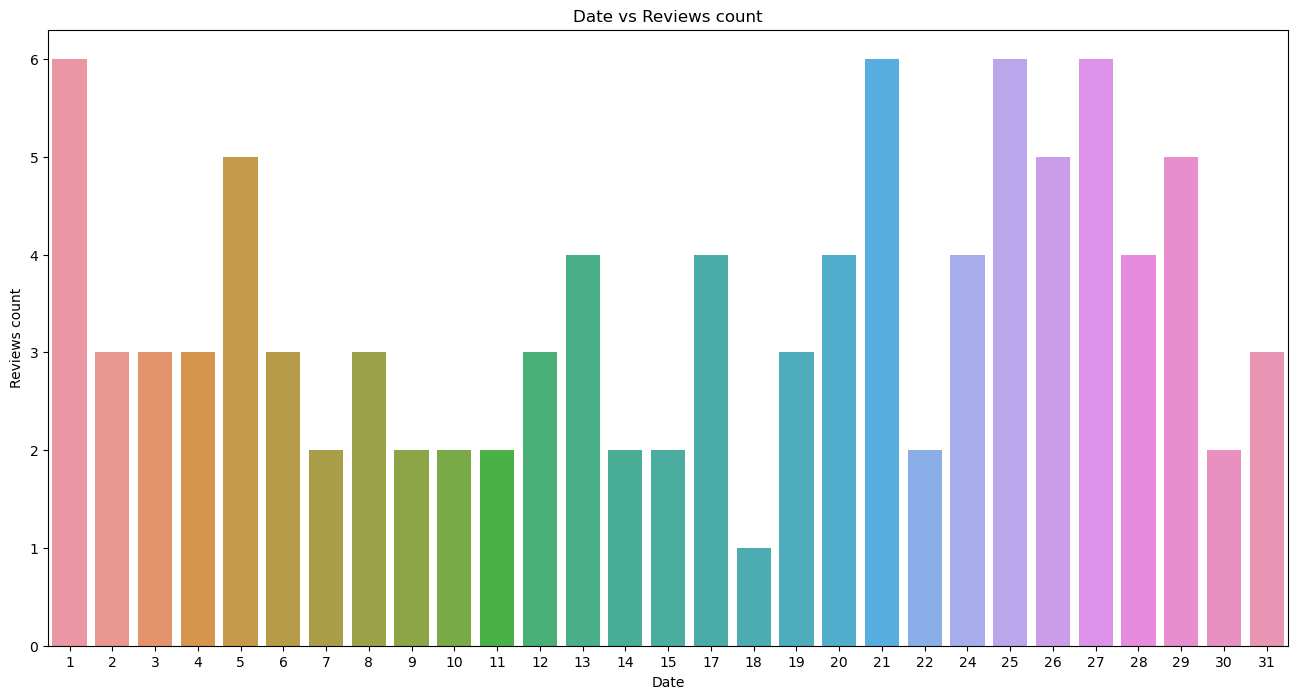

In [46]:
#Creating a dataframe
dayreview = pd.DataFrame(df.groupby('Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Date'].astype('int64')
dayreview.sort_values(by = ['Date'])

#Plotting the graph
plt.figure(figsize=(16,8))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews count')
plt.xlabel('Date')
plt.ylabel('Reviews count')
plt.show()

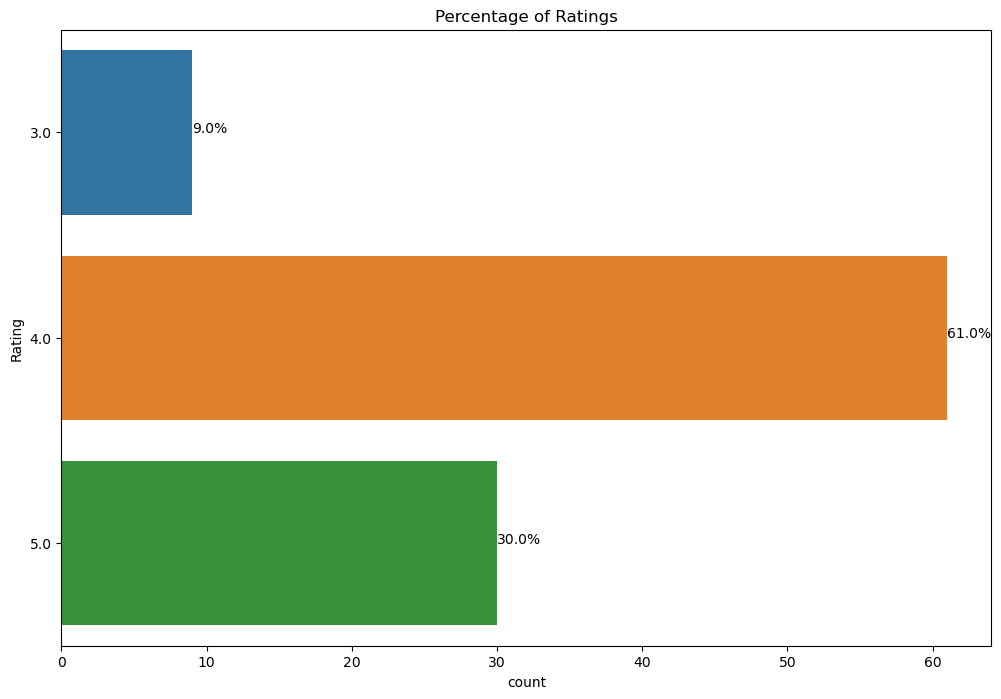

In [49]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

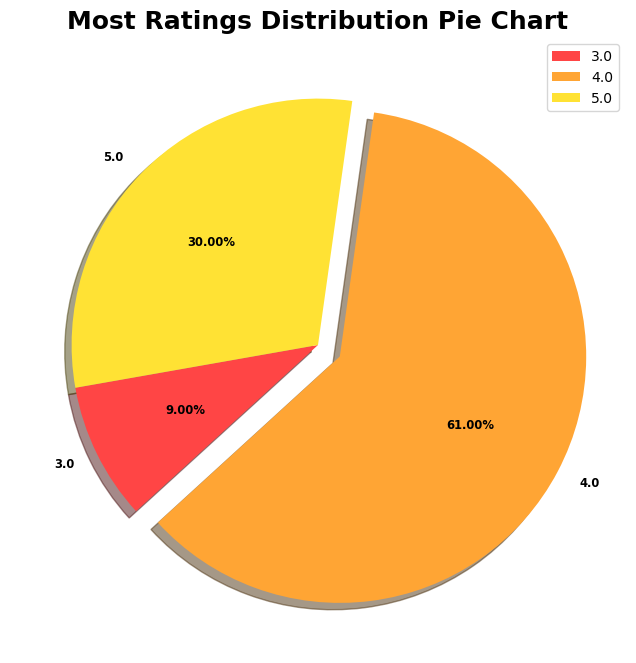

In [56]:
plt.figure(figsize = (12,8))
plt.pie(df['Rating'].value_counts().sort_index(),
       labels=df['Rating'].value_counts().sort_index().index,
         explode = [0.0,0.1,0.0],
       autopct= '%.2f%%',
        colors = ["#ff4545", "#ffa534",'#ffe234','#b7dd29','#57e32c'],
       shadow= True,
       startangle= 190,
       textprops = {'size':'small',
                   'fontweight':'bold',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Most Ratings Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

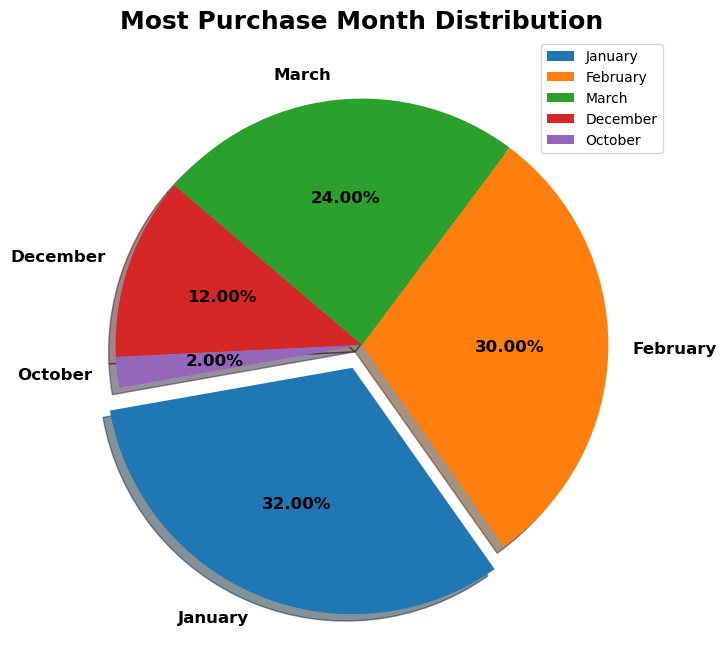

In [61]:
plt.figure(figsize = (12,8))
plt.pie(df['Month'].value_counts(),
       labels=df['Month'].value_counts().index,
       explode = [0.1,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Most Purchase Month Distribution", fontsize = 18, fontweight = 'bold')
plt.show()


### Text Processing

In [62]:
data = df[['Review']]
data

,Review
0,Its a value for money phone. it never disappo...
1,The media could not be loaded.\n ...
2,High quality camera and very attractive features
3,Nord CE 2 is a decent choice for someone looki...
4,I recently purchased the OnePlus Nord CE 2 Lit...
...,...
95,It's up to It's reputation.
96,good product
97,Camera mast nhi h
98,Good mobile phone under this price.


In [63]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['Review'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))

In [64]:
data

,Review
0,its value money phone. never disappointed me. ...
1,the media could loaded. build quality - rating...
2,high quality camera attractive features
3,nord ce 2 decent choice someone looking upgrad...
4,i recently purchased oneplus nord ce 2 lite 5g...
...,...
95,it's it's reputation.
96,good product
97,camera mast nhi h
98,good mobile phone price.


In [65]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(data))):
    cleaned= re.sub('[^a-zA-Z]', " ", data["Review"][i])
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned= ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/100 [00:00<?, ?it/s]

In [66]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": df.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,value money phone never disappointed best char...,Its a value for money phone. it never disappo...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,high quality camera attractive feature,High quality camera and very attractive features
3,nord ce decent choice someone looking upgrade ...,Nord CE 2 is a decent choice for someone looki...
4,recently purchased oneplus nord ce lite g stun...,I recently purchased the OnePlus Nord CE 2 Lit...


#### Removing @

In [67]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [68]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,value money phone never disappointed best char...,Its a value for money phone. it never disappo...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,high quality camera attractive feature,High quality camera and very attractive features
3,nord ce decent choice someone looking upgrade ...,Nord CE 2 is a decent choice for someone looki...
4,recently purchased oneplus nord ce lite g stun...,I recently purchased the OnePlus Nord CE 2 Lit...
5,excellent phone price range,Excellent phone at this price range.
6,good performance fast charging decent battery ...,"Good performance, fast charging and decent bat..."
7,good product performance average fast good day...,Good product. Performance is average. Not very...
8,good mobile within cost,Good mobile within this cost
9,nice phone mind blowing performance fully sati...,Very nice phone . With mind blowing performan...


### Removing URL

In [69]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,value money phone never disappointed best char...,Its a value for money phone. it never disappo...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,high quality camera attractive feature,High quality camera and very attractive features
3,nord ce decent choice someone looking upgrade ...,Nord CE 2 is a decent choice for someone looki...
4,recently purchased oneplus nord ce lite g stun...,I recently purchased the OnePlus Nord CE 2 Lit...
5,excellent phone price range,Excellent phone at this price range.
6,good performance fast charging decent battery ...,"Good performance, fast charging and decent bat..."
7,good product performance average fast good day...,Good product. Performance is average. Not very...
8,good mobile within cost,Good mobile within this cost
9,nice phone mind blowing performance fully sati...,Very nice phone . With mind blowing performan...


### Removing empty review

In [70]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,value money phone never disappointed best char...,Its a value for money phone. it never disappo...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,high quality camera attractive feature,High quality camera and very attractive features
3,nord ce decent choice someone looking upgrade ...,Nord CE 2 is a decent choice for someone looki...
4,recently purchased oneplus nord ce lite g stun...,I recently purchased the OnePlus Nord CE 2 Lit...
5,excellent phone price range,Excellent phone at this price range.
6,good performance fast charging decent battery ...,"Good performance, fast charging and decent bat..."
7,good product performance average fast good day...,Good product. Performance is average. Not very...
8,good mobile within cost,Good mobile within this cost
9,nice phone mind blowing performance fully sati...,Very nice phone . With mind blowing performan...


### Duplicated rows

In [71]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,value money phone never disappointed best char...,Its a value for money phone. it never disappo...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,high quality camera attractive feature,High quality camera and very attractive features
3,nord ce decent choice someone looking upgrade ...,Nord CE 2 is a decent choice for someone looki...
4,recently purchased oneplus nord ce lite g stun...,I recently purchased the OnePlus Nord CE 2 Lit...
5,excellent phone price range,Excellent phone at this price range.
6,good performance fast charging decent battery ...,"Good performance, fast charging and decent bat..."
7,good product performance average fast good day...,Good product. Performance is average. Not very...
8,good mobile within cost,Good mobile within this cost
9,nice phone mind blowing performance fully sati...,Very nice phone . With mind blowing performan...


### Reseting Index

In [72]:
dataframe = dataframe.reset_index(drop=True)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,value money phone never disappointed best char...,Its a value for money phone. it never disappo...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,high quality camera attractive feature,High quality camera and very attractive features
3,nord ce decent choice someone looking upgrade ...,Nord CE 2 is a decent choice for someone looki...
4,recently purchased oneplus nord ce lite g stun...,I recently purchased the OnePlus Nord CE 2 Lit...
5,excellent phone price range,Excellent phone at this price range.
6,good performance fast charging decent battery ...,"Good performance, fast charging and decent bat..."
7,good product performance average fast good day...,Good product. Performance is average. Not very...
8,good mobile within cost,Good mobile within this cost
9,nice phone mind blowing performance fully sati...,Very nice phone . With mind blowing performan...


### Cleaning data

In [73]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [74]:
dataframe['Clean_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: clean_text(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,value money phone never disappointed best char...,Its a value for money phone. it never disappo...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,high quality camera attractive feature,High quality camera and very attractive features
3,nord ce decent choice someone looking upgrade ...,Nord CE 2 is a decent choice for someone looki...
4,recently purchased oneplus nord ce lite g stun...,I recently purchased the OnePlus Nord CE 2 Lit...
5,excellent phone price range,Excellent phone at this price range.
6,good performance fast charging decent battery ...,"Good performance, fast charging and decent bat..."
7,good product performance average fast good day...,Good product. Performance is average. Not very...
8,good mobile within cost,Good mobile within this cost
9,nice phone mind blowing performance fully sati...,Very nice phone . With mind blowing performan...


#### Removing emojis

In [75]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [76]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,value money phone never disappointed best char...,Its a value for money phone. it never disappo...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,high quality camera attractive feature,High quality camera and very attractive features
3,nord ce decent choice someone looking upgrade ...,Nord CE 2 is a decent choice for someone looki...
4,recently purchased oneplus nord ce lite g stun...,I recently purchased the OnePlus Nord CE 2 Lit...
5,excellent phone price range,Excellent phone at this price range.
6,good performance fast charging decent battery ...,"Good performance, fast charging and decent bat..."
7,good product performance average fast good day...,Good product. Performance is average. Not very...
8,good mobile within cost,Good mobile within this cost
9,nice phone mind blowing performance fully sati...,Very nice phone . With mind blowing performan...


In [77]:
dataframe['tokenized_tweets'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,tokenized_tweets
0,value money phone never disappointed best char...,Its a value for money phone. it never disappo...,"[value, money, phone, never, disappointed, bes..."
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...,"[medium, could, loaded, build, quality, rating..."
2,high quality camera attractive feature,High quality camera and very attractive features,"[high, quality, camera, attractive, feature]"
3,nord ce decent choice someone looking upgrade ...,Nord CE 2 is a decent choice for someone looki...,"[nord, ce, decent, choice, someone, looking, u..."
4,recently purchased oneplus nord ce lite g stun...,I recently purchased the OnePlus Nord CE 2 Lit...,"[recently, purchased, oneplus, nord, ce, lite,..."
5,excellent phone price range,Excellent phone at this price range.,"[excellent, phone, price, range]"
6,good performance fast charging decent battery ...,"Good performance, fast charging and decent bat...","[good, performance, fast, charging, decent, ba..."
7,good product performance average fast good day...,Good product. Performance is average. Not very...,"[good, product, performance, average, fast, go..."
8,good mobile within cost,Good mobile within this cost,"[good, mobile, within, cost]"
9,nice phone mind blowing performance fully sati...,Very nice phone . With mind blowing performan...,"[nice, phone, mind, blowing, performance, full..."


In [78]:
dataframe.drop(['tokenized_tweets'],axis=1,inplace=True)

### Removing Stop words

In [79]:
import codecs
with codecs.open(r'C:/Users/DELL/Downloads/stop.txt', encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [80]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [81]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,value money phone never disappointed best char...,Its a value for money phone. it never disappo...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,high quality camera attractive feature,High quality camera and very attractive features
3,nord ce decent choice someone looking upgrade ...,Nord CE 2 is a decent choice for someone looki...
4,recently purchased oneplus nord ce lite g stun...,I recently purchased the OnePlus Nord CE 2 Lit...
5,excellent phone price range,Excellent phone at this price range.
6,good performance fast charging decent battery ...,"Good performance, fast charging and decent bat..."
7,good product performance average fast good day...,Good product. Performance is average. Not very...
8,good mobile within cost,Good mobile within this cost
9,nice phone mind blowing performance fully sati...,Very nice phone . With mind blowing performan...


### Tokenizing the 'Clean Review'

In [82]:
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['medium', 'could', 'loaded', 'build', 'quality', 'rating', 'one', 'light', 'weight', 'phone', 'say', 'quite', 'comfortable', 'one', 'hand', 'usage', 'even', 'material', 'used', 'polycarbonate', 'get', 'job', 'done', 'matter', 'back', 'cover', 'term', 'styling', 'similar', 'oppo', 'phone', 'liked', 'recommend', 'gray', 'one', 'attache', 'fingerprint', 'going', 'use', 'back', 'cover', 'matterdisplay', 'rating', 'really', 'good', 'amoled', 'plan', 'hz', 'refresh', 'rate', 'work', 'well', 'wish', 'could', 'hz', 'bottom', 'chin', 'quite', 'thick', 'thing', 'yes', 'gorilla', 'glass', 'protection', 'screen', 'guard', 'pre', 'applied', 'panel', 'one', 'best', 'pretty', 'decent', 'wellperformance', 'rating', 'dimensity', 'ufs', 'lppdr', 'x', 'ram', 'get', 'job', 'done', 'regular', 'day', 'day', 'operation', 'played', 'game', 'say', 'considering', 'soc', 'pretty', 'good', 'expect', 'fps', 'stable', 'bgmi', 'cod', 'still', 'would', 'say', 'processor', 'good', 'competition', 'offering', 

In [83]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [value, money, phone, never, disappointed, bes...
1    [medium, could, loaded, build, quality, rating...
2         [high, quality, camera, attractive, feature]
3    [nord, ce, decent, choice, someone, looking, u...
4    [recently, purchased, oneplus, nord, ce, lite,...
5                     [excellent, phone, price, range]
6    [good, performance, fast, charging, decent, ba...
7    [good, product, performance, average, fast, go...
8                         [good, mobile, within, cost]
9    [nice, phone, mind, blowing, performance, full...
Name: Clean_Reviews, dtype: object

### Converting words to lemma

In [84]:
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')
yy=pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...


,stemmed
0,value money phone never disappointed best char...
1,medium could loaded build quality rating one l...
2,high quality camera attractive feature
3,nord ce decent choice someone looking upgrade ...
4,recently purchased oneplus nord ce lite g stun...
...,...
94,reputation
95,good product
96,camera mast nhi h
97,good mobile phone price


### Words without N-grams

In [85]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [86]:
print(cv.vocabulary_)

{'value': 650, 'money': 371, 'phone': 448, 'never': 386, 'disappointed': 160, 'best': 51, 'charging': 96, 'speed': 578, 'nice': 390, 'bettry': 53, 'life': 318, 'play': 457, 'pub': 487, 'smooth': 564, 'extreme': 194, 'easily': 170, 'much': 375, 'heating': 266, 'issue': 300, 'medium': 357, 'could': 130, 'loaded': 326, 'build': 74, 'quality': 491, 'rating': 498, 'one': 413, 'light': 319, 'weight': 666, 'say': 536, 'quite': 492, 'comfortable': 110, 'hand': 259, 'usage': 644, 'even': 181, 'material': 351, 'used': 647, 'polycarbonate': 461, 'get': 242, 'job': 304, 'done': 163, 'matter': 352, 'back': 36, 'cover': 133, 'term': 609, 'styling': 593, 'similar': 554, 'oppo': 418, 'liked': 322, 'recommend': 505, 'gray': 255, 'attache': 29, 'fingerprint': 215, 'going': 249, 'use': 646, 'matterdisplay': 353, 'really': 502, 'good': 250, 'amoled': 18, 'plan': 455, 'hz': 278, 'refresh': 509, 'rate': 497, 'work': 675, 'well': 667, 'wish': 672, 'bottom': 63, 'chin': 101, 'thick': 615, 'thing': 617, 'yes':

In [89]:
print(cv.get_feature_names_out())

['able' 'accurate' 'acha' 'achievable' 'achieve' 'ad' 'adapter' 'add'
 'adding' 'adjust' 'afterwards' 'ago' 'alike' 'almost' 'also' 'always'
 'amazing' 'amazon' 'amoled' 'android' 'angle' 'anyways' 'app' 'applied'
 'approximately' 'apps' 'around' 'asked' 'atleast' 'attache' 'attractive'
 'audio' 'available' 'average' 'avoided' 'aware' 'back' 'background'
 'backup' 'bad' 'bahut' 'band' 'based' 'basic' 'batter' 'battery' 'baught'
 'beautiful' 'becomes' 'believe' 'beneficial' 'best' 'better' 'bettry'
 'bezel' 'bgmi' 'bidu' 'biggest' 'bit' 'bloat' 'bloatwares' 'blowing'
 'blue' 'bottom' 'bought' 'brand' 'breaker' 'breeze' 'brightness' 'browse'
 'browsing' 'budget' 'bug' 'buggier' 'build' 'busy' 'buy' 'buyer' 'buying'
 'call' 'cam' 'camara' 'camera' 'canera' 'capability' 'capture' 'care'
 'case' 'casual' 'cater' 'causing' 'ce' 'change' 'changing' 'charge'
 'charger' 'charging' 'chat' 'cheap' 'check' 'checking' 'chin' 'choice'
 'clean' 'clear' 'cod' 'collecting' 'color' 'coloros' 'come' 'com

In [91]:
print(tweetscv.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#### CountVectorizer with N-grams (Bigrams & Trigrams)

In [92]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/99 [00:00<?, ?it/s]

In [93]:
corpus[3]

'nord ce decent choic someon look upgrad k segment phone review use gb variant day pro decent batteri life excel charg speed smooth perform display compar compact light weight unoffici water resist read design color neatcon speaker great camera okayish unsur experi futur stabl bloat free nowdetail decent batteri life perform got around hr screen time batteri normal use g internet social medium chat camera mobil hotspot tether hz display refresh rate chang display refresh rate hz seem improv batteri drain hz look smooth w fast charg great charg minut also much heat charg look clean preinstal app could uninstal disabl surprisingli found file manag app two disabl two photo app oneplu galleri googl photo app uninstal find bug function issu lag stutter app open instantli work fine oxygeno feb secur patch guess stabl android better buggier android custom sure happen oxygeno share oppo coloro heat issu first day use got system updat notic heat afterward saw rubber seal sim tray could mean deg

In [94]:
## Applying Countvectorizer
# Creating the Bag of Words model
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [95]:

X.shape

(99, 3361)

In [96]:
cv.get_feature_names_out()

array(['abl', 'abl buy', 'abl buy phone', ...,
       'youtub instagram facebook', 'youtub video', 'youtub video test'],
      dtype=object)

In [97]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [99]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names_out())
count_df

,abl,abl buy,abl buy phone,accur,accur date,accur date inform,acha,acha mobil,achiev,achiev hr,...,year last easili,year use,year use redmi,year without,year without problem,youtub,youtub instagram,youtub instagram facebook,youtub video,youtub video test
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###  TF-IDF Vectorizer

In [100]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/99 [00:00<?, ?it/s]

In [101]:
corpus[4]

'recent purchas oneplu nord ce lite g stun blue tide color equip gb ram gb storag overal experi posit notabl strength speed featur sound qualiti price speed oneplu nord ce lite g impress thank gb ram multitask breez app open run smoothli without notic lag devic g capabl add overal fast respons user experi make great choic priorit speed budget friendli phone term featur oneplu nord ce lite g disappoint come pack varieti function enhanc user experi devic offer well round set featur cater casual user tech enthusiast alik sound qualiti oneplu nord ce lite g surprisingli good price point audio output clear loud make enjoy medium consumpt game call phone speaker system deliv satisfi audio experi ad valu overal packag howev coupl drawback might signific user firstli screen bright overpow caus discomfort user case particularli problemat dad prolong usag led eye strain would benefici oneplu offer custom option screen bright cater individu prefer need outdoor camera perform oneplu nord ce lite g

In [102]:
## TFidf Vectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [103]:
X.shape

(99, 3361)

In [104]:

tfidf_v.get_feature_names_out()

array(['abl', 'abl buy', 'abl buy phone', ...,
       'youtub instagram facebook', 'youtub video', 'youtub video test'],
      dtype=object)

In [105]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [106]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names_out())
count_df

,abl,abl buy,abl buy phone,accur,accur date,accur date inform,acha,acha mobil,achiev,achiev hr,...,year last easili,year use,year use redmi,year without,year without problem,youtub,youtub instagram,youtub instagram facebook,youtub video,youtub video test
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.03263,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.029866,0.0,0.0,0.032553,0.032553
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000


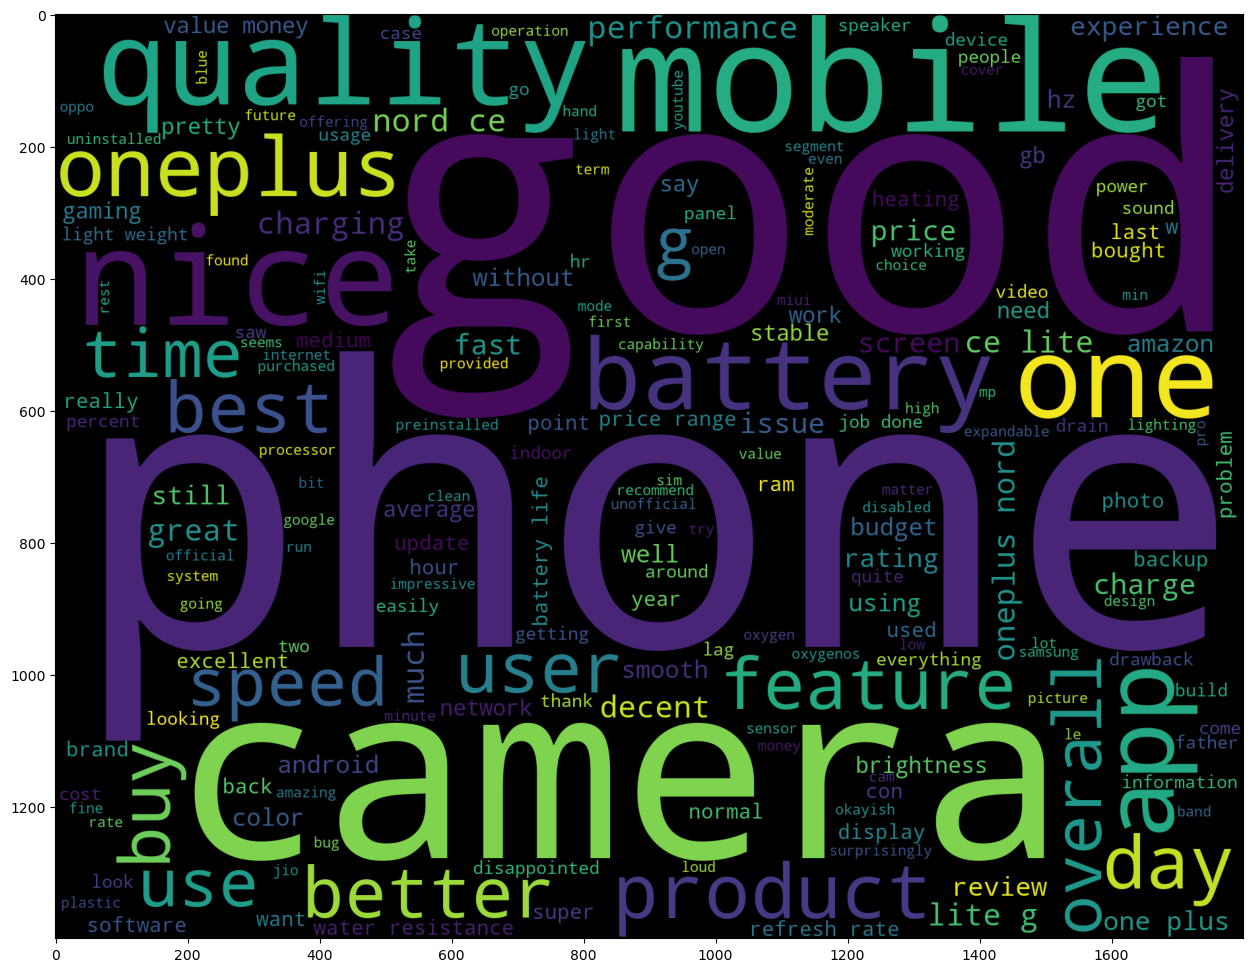

In [107]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(20,12))
wordcloud= WordCloud(
        background_color = 'black',
        width = 1800,
        height =1400).generate(allWords_)
plt.imshow(wordcloud)